<a href="https://colab.research.google.com/github/JeroBernat/Extraccion-de-Caracteristicas/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Instalamos librería para el análisis de variables categóricas
%pip install funpymodeling

In [6]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [7]:
#Código para imprimir todo el frame
pd.options.display.max_rows= 100

In [ ]:
#Cargar archivo desde equipo
from google.colab import files
files.upload()

In [9]:
#Leemos el archivo
from pandas.io.excel import read_excel
data = pd.read_excel("microretailer_mit_lift_lab.xlsx")

##Selección de variables relevantes para el análisis

In [10]:
#Lista con las etiquetas de las columnas del frame
lista = data.columns

In [11]:
#Creamos una copia del frame
data1 = data.copy()

In [12]:
#Eliminamos las columnas con valores numéricos
for i in lista:
  tipo = data1[i].dtype
  if (tipo == "float64")|(tipo == "int64"):
    data1.pop(i)

In [13]:
#Frame con unicamente columnas con variables categórica
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 81 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   _record_id                                                  171 non-null    object
 1   _title                                                      171 non-null    object
 2   _server_updated_at                                          171 non-null    object
 3   _updated_by                                                 171 non-null    object
 4   _geometry                                                   171 non-null    object
 5   228_store_name                                              171 non-null    object
 6   229_store_picture                                           171 non-null    object
 7   232_type_of_store                                           171 non-null    object
 8   108_does_t

In [14]:
#Lista con las etiquetas de las columnas del nuevo frame
nuevalista = data1.columns

In [15]:
#Eliminaremos las columnas que tengan más del 50% de sus instancias con valores nulos
#Esto para quedarnos con las columnas que contengan mayor información
for i in nuevalista:
  criterio = len(data1)/2 #50% de las instancias
  if (data1[i].isnull().sum()) > criterio:
    data1.pop(i)

In [16]:
#Información del las columnas restantes
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   _record_id                                                  171 non-null    object
 1   _title                                                      171 non-null    object
 2   _server_updated_at                                          171 non-null    object
 3   _updated_by                                                 171 non-null    object
 4   _geometry                                                   171 non-null    object
 5   228_store_name                                              171 non-null    object
 6   229_store_picture                                           171 non-null    object
 7   232_type_of_store                                           171 non-null    object
 8   108_does_t

In [74]:
#Ahora seleccionamos las columnas que son de relevancia para el análisis de sus características
data2 = data1.iloc[:,[7,8,9,10,11,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]

#Frame final listo para el análisis de características
data2.head()

,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,5_change_store_space_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,19_tax_id,310_burnout,186_internet_connection,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,227_agreement_ecommerce_platforms,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space
0,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,No cambió,yes,Software especializado + computadora,Software especializado + computadora,yes,no,yes,"Efectivo,Transferencia interbancaria",Redes sociales,no,no,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0
1,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),Aumentó 15%,yes,No lo hago,No lo hago,no,no,yes,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,no,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%
2,Grocery store (aka. nanostore),yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",No cambió,yes,En Excel,Software especializado + computadora,no,no,yes,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes,no,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,10%
3,Grocery store (aka. nanostore),no,no,no,POS system (i.e. computer + bar code scanner +...,No cambió,yes,Software especializado + computadora,Software especializado + computadora,yes,no,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,no,no,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto,0
4,Grocery store (aka. nanostore),yes,no,no,Smartphone,No cambió,yes,En papel,En papel,yes,no,yes,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,yes,no,Mensualmente,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie...",0


##Valores nulos

In [75]:
#Identificar valores nulos
print(data2.isnull().sum())

232_type_of_store                                         0
108_does_the_micro_retailer_has_a_barred_window_          0
99_does_the_micro_retailer_exhibits_products_outside_     0
102_does_the_micro_retailer_sells_fresh_products_         0
184_store_devices                                         2
5_change_store_space_last_year                           72
20_reviews_finances_monthly                              63
49_inventory_records                                     61
18_sales_records                                         61
19_tax_id                                                71
310_burnout                                              64
186_internet_connection                                  63
189_payment_methods                                      64
214_customer_relationship_tools                          76
33_credit_to_customers                                   64
227_agreement_ecommerce_platforms                        73
157_frequency_organize_shelves          

In [76]:
#Remplazar todos los valores nulos en el frame con el método de forward fill
data2 = data2.fillna(method="ffill")

#Comprobación
print(data2.isnull().sum())

232_type_of_store                                        0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
102_does_the_micro_retailer_sells_fresh_products_        0
184_store_devices                                        0
5_change_store_space_last_year                           0
20_reviews_finances_monthly                              0
49_inventory_records                                     0
18_sales_records                                         0
19_tax_id                                                0
310_burnout                                              0
186_internet_connection                                  0
189_payment_methods                                      0
214_customer_relationship_tools                          0
33_credit_to_customers                                   0
227_agreement_ecommerce_platforms                        0
157_frequency_organize_shelves                          

<ipython-input-76-e5cded0905ef>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2 = data2.fillna(method="ffill")


#Análisis univariado

##Columna "232_type_of_store"

###Tabla de frecuencia

In [77]:
#Tabla de frecuencia de la primera columna

#Analisis de la columna
columna1 = freq_tbl(data2["232_type_of_store"])
columna1

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427
6,Handmade products,2,0.011696,0.649123
7,Papelería,2,0.011696,0.660819
8,objetos,2,0.011696,0.672515
9,Ferretería,2,0.011696,0.684211


In [78]:
#Eliminamos aqueloss valores cuyas frecuencias sean bajas para un mejor análisis
filtro1 = columna1[columna1["frequency"]>1]
filtro1

#Ajustamos el índice del data frame con los valores de dicha columna
filtro1_indice = filtro1.set_index("232_type_of_store")
filtro1_indice

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


###Gráfica

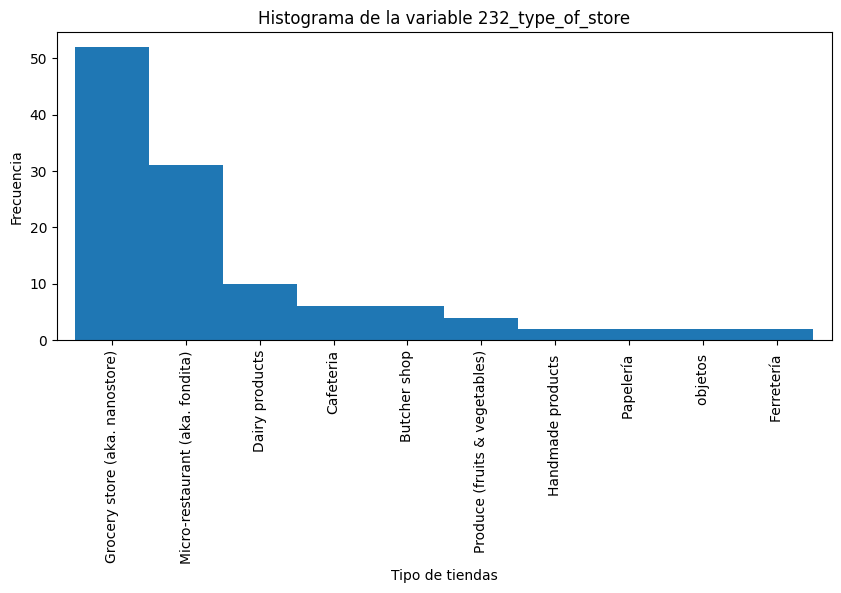

In [79]:
#Histograma (gráfico de barras de frecuencia)
filtro1_indice["frequency"].plot(kind="bar",width=1,figsize=(10,4))
plt.title("Histograma de la variable 232_type_of_store")
plt.xlabel("Tipo de tiendas")
plt.ylabel("Frecuencia")
plt.show()

**Hallazgos**
- Podemos ver en el historgama de esta variable que los tipos de tienda más comunes son las "Grosery store" con alrededor de 50 instancias en la base de datos, seguido de los "micro-restaurant" con alrededor de 30 instancias. Estos 2 tipos de tiendas son los que predoniman, ya que los demás tipos tienen menos de 10 instancias, valor significativamente menor, lo que quiere decir que son menos frecuentes.

##Columna "108_does_the_micro_retailer_has_a_barred_window_"

###Tabla de frequencia

In [80]:
#Tabla de frecuencia de la segunda columna

#Analisis de la columna
columna2 = freq_tbl(data2["108_does_the_micro_retailer_has_a_barred_window_"])
columna2

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [81]:
#En esta columna no eliminaremos ninguna de las filas ya que unicamente se tienen 2 valores, por lo que podemos decir que es una variable binaria

#Ajustamos el índice del data frame con los valores de dicha columna
filtro2_indice = columna2.set_index("108_does_the_micro_retailer_has_a_barred_window_")
filtro2_indice

,frequency,percentage,cumulative_perc
108_does_the_micro_retailer_has_a_barred_window_,,,
no,124,0.725146,0.725146
yes,47,0.274854,1.000000


###Gráfica

<Axes: ylabel='percentage'>

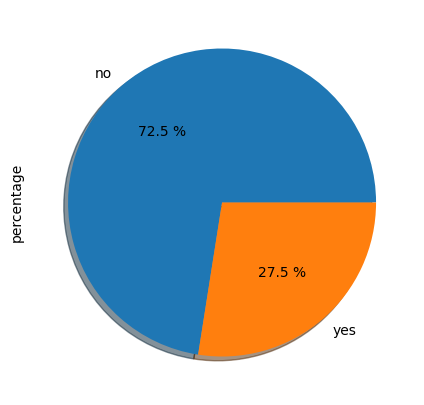

In [82]:
#Gráfico de pastel
filtro2_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")

**Hallazgos**
- Podemos ver en el gráfico de pie de esta variable que la mayoría de las PYMEs no tienen rejas en las ventanas de las tiendas, siendo estas el 72.5% y solo el 27.5% si cuenta con rejas.

##Columna "99_does_the_micro_retailer_exhibits_products_outside_"

###Tabla de frequencia

In [83]:
#Tabla de frecuencia de la tercera columna

#Analisis de la columna
columna3 = freq_tbl(data2["99_does_the_micro_retailer_exhibits_products_outside_"])
columna3

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [84]:
#En esta columna no eliminaremos ninguna de las filas ya que unicamente se tienen 2 valores, por lo que podemos decir que es una variable binaria

#Ajustamos el índice del data frame con los valores de dicha columna
filtro3_indice = columna3.set_index("99_does_the_micro_retailer_exhibits_products_outside_")
filtro3_indice

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


###Gráfica

<Axes: ylabel='percentage'>

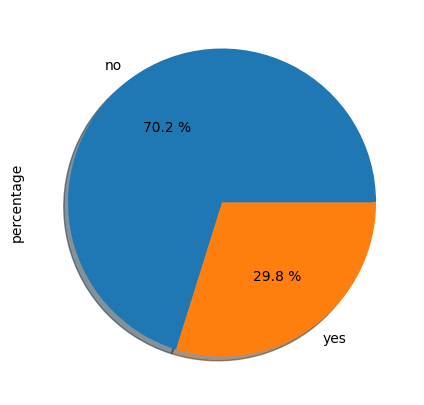

In [85]:
#Gráfico de pastel
filtro3_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")

**Hallazgos**
- En el gráfico de pie de esta variable podemos ver que solo pocas PYMEs exhiben productos afuera, siendas estas el 29.8% y el 70.2% no lo hacen. Estos porcentages coinciden con los de la variable anterior, por lo que podríamos decir que estas variable puedieran tener causalidad entre ellas. Si la tienda exibe un producto afuera esta podría tener rejas por seguridad.

##Columna "102_does_the_micro_retailer_sells_fresh_products_"

###Tabla de frequencia

In [86]:
#Tabla de frecuencia de la cuarta columna

#Analisis de la columna
columna4 = freq_tbl(data2["102_does_the_micro_retailer_sells_fresh_products_"])
columna4

,102_does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


In [87]:
#En esta columna no eliminaremos ninguna de las filas ya que unicamente se tienen 2 valores, por lo que podemos decir que es una variable binaria

#Ajustamos el índice del data frame con los valores de dicha columna
filtro4_indice = columna4.set_index("102_does_the_micro_retailer_sells_fresh_products_")
filtro4_indice

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


###Gráfica

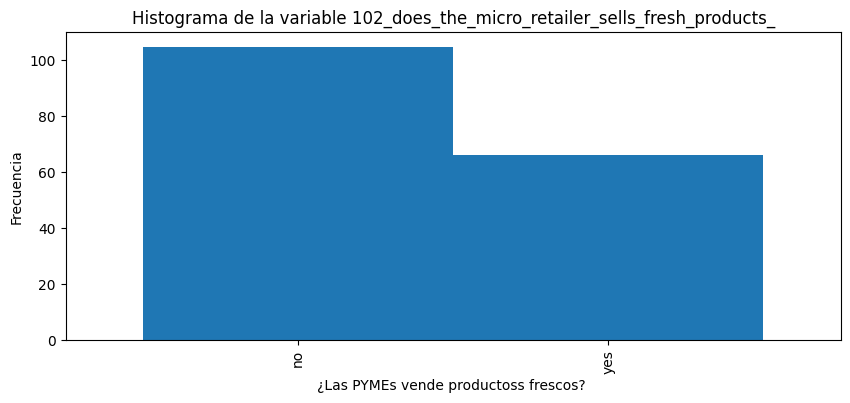

In [88]:
#Histograma (gráfico de barras de frecuencia)
filtro4_indice["frequency"].plot(kind="bar",width=1,figsize=(10,4))
plt.title("Histograma de la variable 102_does_the_micro_retailer_sells_fresh_products_")
plt.xlabel("¿Las PYMEs vende productoss frescos? ")
plt.ylabel("Frecuencia")
plt.show()

**Hallazgo**
- En el histograma de esta variable podemos ver que son más las PYMEs que no venden productos frescos, a que las que si venden. Esto podría estar relacionado con la complejidad de manejar productos parecederos en un negocio.

##Columna "184_store_devices"

###Tabla de frequencia

In [89]:
#Tabla de frecuencia de la quinta columna

#Analisis de la columna
columna5 = freq_tbl(data2["184_store_devices"])
columna5

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,53,0.309942,0.309942
1,Analog cash register,16,0.093567,0.403509
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.456140
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.508772
4,"Analog cash register,Smartphone",8,0.046784,0.555556
5,"Security cameras,Smartphone",7,0.040936,0.596491
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.625731
7,Security cameras,5,0.029240,0.654971
8,Dataphone (i.e. card payments),4,0.023392,0.678363
9,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.701754


In [90]:
#Eliminamos aquellos valores cuyas frecuencias sean bajas para un mejor análisis y visualización
filtro5 = columna5[columna5["frequency"]>3]
filtro5

#Ajustamos el índice del data frame con los valores de dicha columna
filtro5_indice = filtro5.set_index("184_store_devices")
filtro5_indice

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,53,0.309942,0.309942
Analog cash register,16,0.093567,0.403509
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.456140
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.508772
"Analog cash register,Smartphone",8,0.046784,0.555556
"Security cameras,Smartphone",7,0.040936,0.596491
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.625731
Security cameras,5,0.029240,0.654971
Dataphone (i.e. card payments),4,0.023392,0.678363


###Gráfica

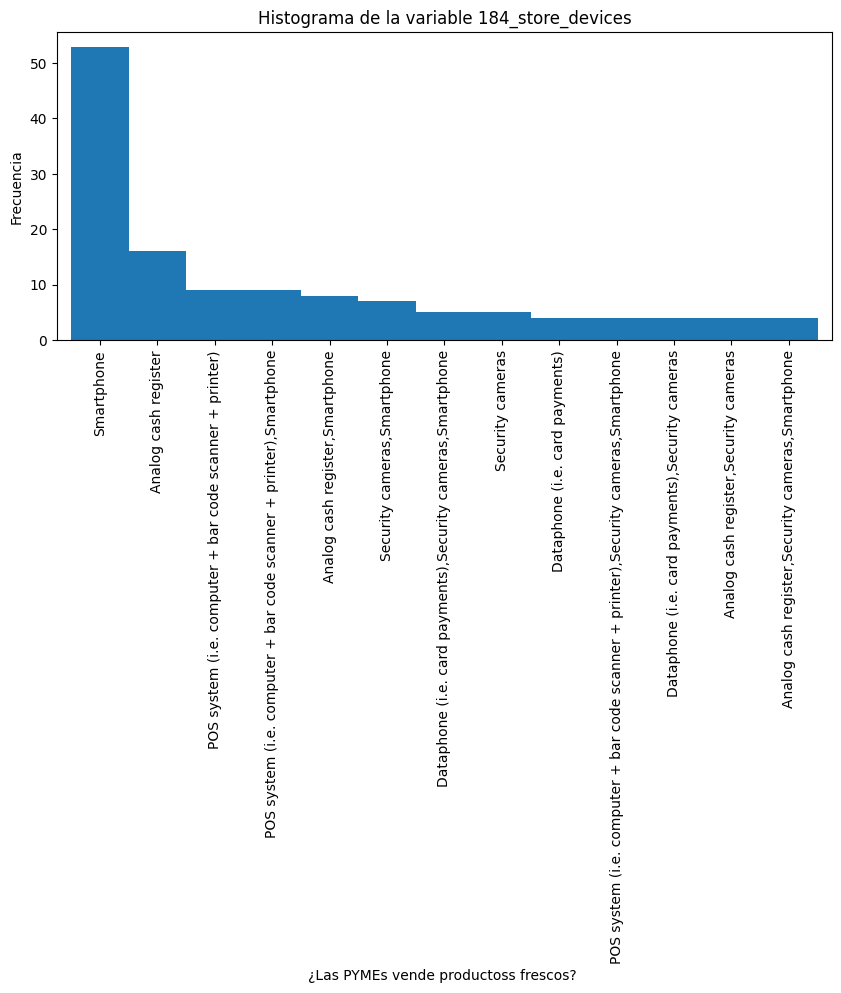

In [92]:
#Histograma (gráfico de barras de frecuencia)
filtro5_indice["frequency"].plot(kind="bar",width=1,figsize=(10,4))
plt.title("Histograma de la variable 184_store_devices")
plt.xlabel("¿Las PYMEs vende productoss frescos? ")
plt.ylabel("Frecuencia")
plt.show()

**Hallazgos**
- Podemos ver en el histograma de esta variable que los dispositivos que más se usan en las PYMEs son los smartphones, siendo su frecuencia significativamente mayor que los demás dispositivos. Seguidos de estos se encuentran las cajas registradoras y las terminales punto venta. Esto hace sentido, debido a la variedad de usos que un smartphone ofrece, por lo que es lógico que la mayoría de las PYMES tengan uno.

##Columna "5_change_store_space_last_year"

###Tabla de frequencia

In [93]:
#Tabla de frecuencia de la sexta columna

#Analisis de la columna
columna6 = freq_tbl(data2["5_change_store_space_last_year"])
columna6

,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,132,0.771930,0.771930
1,Aumentó 25%,13,0.076023,0.847953
2,Disminuyó 15%,11,0.064327,0.912281
3,Aumentó 15%,4,0.023392,0.935673
4,Aumentó 50% o más,4,0.023392,0.959064
5,Disminuyó 25%,4,0.023392,0.982456
6,Disminuyó 50% o más,3,0.017544,1.000000


In [94]:
#Ajustamos el índice del data frame con los valores de dicha columna
filtro6_indice = columna6.set_index("5_change_store_space_last_year")
filtro6_indice

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,132,0.771930,0.771930
Aumentó 25%,13,0.076023,0.847953
Disminuyó 15%,11,0.064327,0.912281
Aumentó 15%,4,0.023392,0.935673
Aumentó 50% o más,4,0.023392,0.959064
Disminuyó 25%,4,0.023392,0.982456
Disminuyó 50% o más,3,0.017544,1.000000


###Gráfica

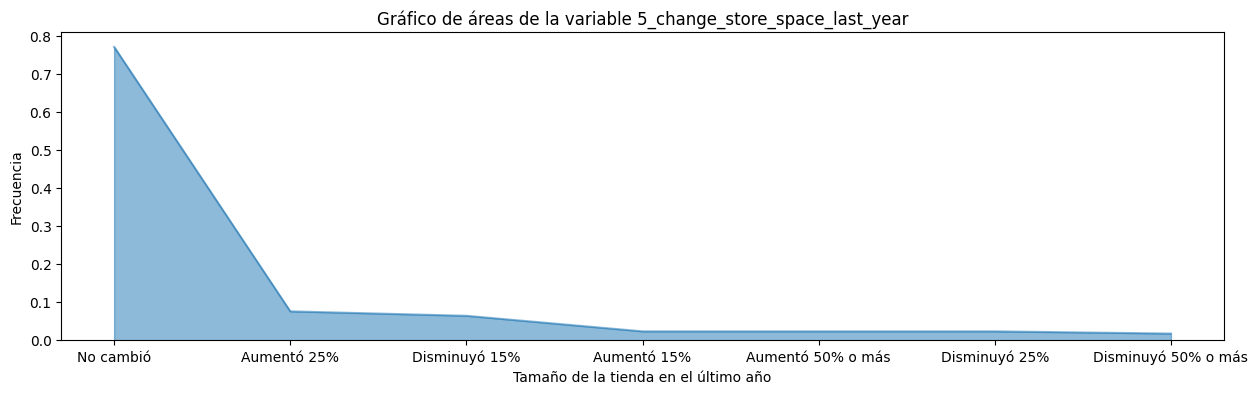

In [95]:
#Gráfico de área
filtro6_indice["percentage"].plot(kind="area",alpha=0.5,figsize=(15,4))
plt.title("Gráfico de áreas de la variable 5_change_store_space_last_year")
plt.xlabel("Tamaño de la tienda en el último año")
plt.ylabel("Frecuencia")
plt.show()

**Hallazgos**
- Podemos ver en el gráfico de áreas de la variable que el 80% de las PYMEs permanecieron del mismo tamaño en comparación al año enterior y el alrededor del 10% aumentaron un 25% su tamaño. Lo normal es que las tiendas permanezcan del mismo tamaño, y ese 10% que aumentaton puede ser PYMEs que les fue bien en ese año.

##Columna "20_reviews_finances_monthly"

###Tabla de frequencia

In [96]:
#Tabla de frecuencia de la séptima columna

#Analisis de la columna
columna7 = freq_tbl(data2["20_reviews_finances_monthly"])
columna7

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,120,0.701754,0.701754
1,no,51,0.298246,1.000000


In [97]:
#Ajustamos el índice del data frame con los valores de dicha columna
filtro7_indice = columna7.set_index("20_reviews_finances_monthly")
filtro7_indice

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,120,0.701754,0.701754
no,51,0.298246,1.000000


###Gráfica

<Axes: ylabel='percentage'>

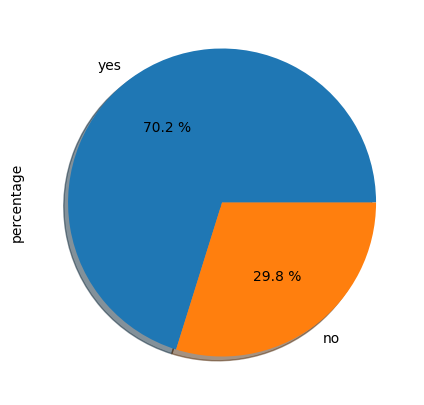

In [98]:
#Gráfico de pastel
filtro7_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")

**Hallazgos**
- Podemos ver en la gráfica de pie de esta variable que la mayoría de las PYMEs si checan sus finanzas mensualmente, siendo el 70%. Se me hace bajo este porcentaje porque para llevar acabo un negocio es fundamental llevar un registro constante de las finanzas.

##Columna "49_inventory_records"

###Tabla de frequencia

In [99]:
#Tabla de frecuencia de la octava columna

#Analisis de la columna
columna8 = freq_tbl(data2["49_inventory_records"])
columna8

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,63,0.368421,0.368421
1,No lo hago,36,0.210526,0.578947
2,En Excel,35,0.204678,0.783626
3,Software especializado + computadora,24,0.140351,0.923977
4,"En Excel,En papel",7,0.040936,0.964912
5,"En papel,Mental",3,0.017544,0.982456
6,Mentalmente,1,0.005848,0.988304
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [100]:
#Eliminamos aqueloss valores cuyas frecuencias sean bajas para un mejor análisis
filtro8 = columna8[columna8["frequency"]>5]

#Ajustamos el índice del data frame con los valores de dicha columna
filtro8_indice = filtro8.set_index("49_inventory_records")
filtro8_indice

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,63,0.368421,0.368421
No lo hago,36,0.210526,0.578947
En Excel,35,0.204678,0.783626
Software especializado + computadora,24,0.140351,0.923977
"En Excel,En papel",7,0.040936,0.964912


###Gráfica

Text(0.5, 1.0, '¿Cómo llevan el inventario de las PYMEs?')

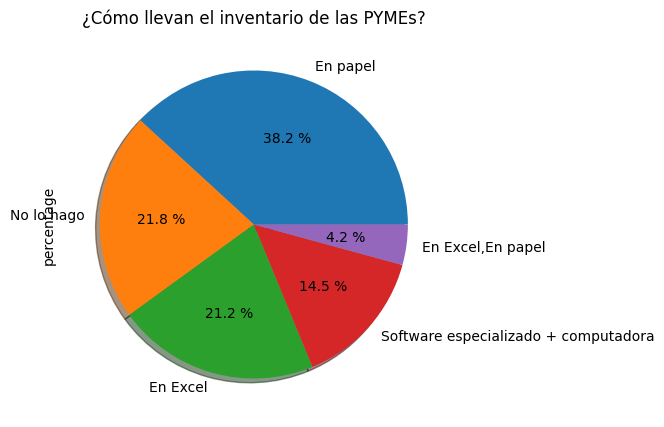

In [101]:
#Gráfico de pastel
filtro8_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("¿Cómo llevan el inventario de las PYMEs?")

**Hallazgos**
- Podemos ver en la gráfica de pie de esta variable que la la forma de llevar el inventario en las PYMEs más frecuente es un papel. Esto hace sentido, ya que las PYMEs no suelen tener equipos computarizados y softwares por lo que realizan esta acción en papel. El 21.2% lo hace en excel y sorprendentemente el 21.8% no lleva acabo esta acción, lo que no habla positivamente de la operación de aquellas PYMEs.

##Columna "18_sales_records"

###Tabla de frequencia

In [102]:
#Tabla de frecuencia de la novena columna

#Analisis de la columna
columna9 = freq_tbl(data2["18_sales_records"])
columna9

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,79,0.461988,0.461988
1,Software especializado + computadora,25,0.146199,0.608187
2,No lo hago,20,0.116959,0.725146
3,En Excel,20,0.116959,0.842105
4,Caja registradora (análoga),6,0.035088,0.877193
5,"En Excel,En papel",6,0.035088,0.912281
6,Contadora,5,0.029240,0.941520
7,"Aplicación móvil (i.e. App) + smartphone,Softw...",3,0.017544,0.959064
8,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.964912
9,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.970760


In [103]:
#Eliminamos aqueloss valores cuyas frecuencias sean bajas para un mejor análisis
filtro9 = columna9[columna9["frequency"]>5]

#Ajustamos el índice del data frame con los valores de dicha columna
filtro9_indice = filtro9.set_index("18_sales_records")
filtro9_indice

,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,79,0.461988,0.461988
Software especializado + computadora,25,0.146199,0.608187
No lo hago,20,0.116959,0.725146
En Excel,20,0.116959,0.842105
Caja registradora (análoga),6,0.035088,0.877193
"En Excel,En papel",6,0.035088,0.912281


###Gráfica

Text(0.5, 1.0, '¿Cómo llevan las ventas las PYMEs?')

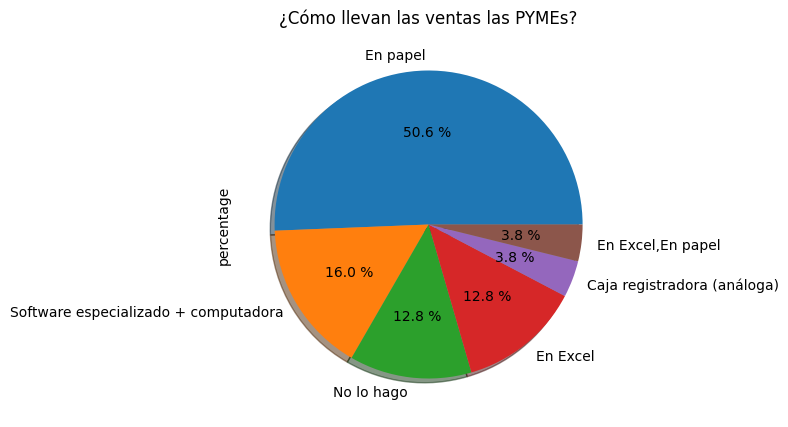

In [104]:
#Gráfico de pastel
filtro9_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("¿Cómo llevan las ventas las PYMEs?")

**Hallazgos**
- Podemos ver en el gráfico de pie de esta variable que la mitad de las PYMES llevas si regisro de ventas en papel, esto por lo mismo de la variable anterior. Solo el 16% usan softwares especializados y el 12.8% utiliza excel.

##Columna "19_tax_id"

###Tabla de frequencia

In [105]:
#Tabla de frecuencia de la decima columna

#Analisis de la columna
columna10 = freq_tbl(data2["19_tax_id"])
columna10

,19_tax_id,frequency,percentage,cumulative_perc
0,yes,123,0.719298,0.719298
1,no,48,0.280702,1.000000


In [106]:
#Ajustamos el índice del data frame con los valores de dicha columna
filtro10_indice = columna10.set_index("19_tax_id")
filtro10_indice

,frequency,percentage,cumulative_perc
19_tax_id,,,
yes,123,0.719298,0.719298
no,48,0.280702,1.000000


###Gráfica

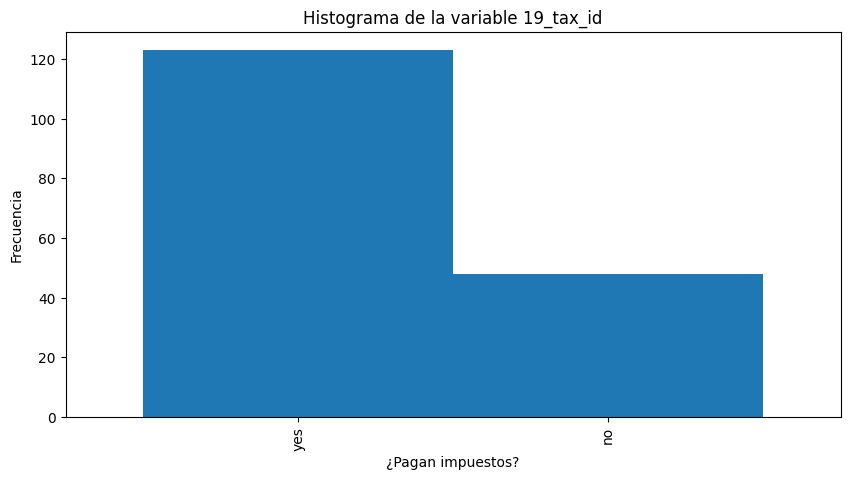

In [107]:
#Histograma (gráfico de barras)
filtro10_indice["frequency"].plot(kind="bar",width=1,figsize=(10,5))
plt.title("Histograma de la variable 19_tax_id")
plt.xlabel("¿Pagan impuestos?")
plt.ylabel("Frecuencia")
plt.show()

**Hallazgos**
- Podemos ver en el histograma de esta variable que la mayoría de las PYMEs si pagan impuestos, siendo significativamente mayor a las que no lo hacen. Esto depende del negocio y la cantidad que se facture al año, probablemente las que si facturen más dinero y por eso ya tengan que pagar impuestos.

##Columna "310_burnout"

###Tabla de frequencia

In [108]:
#Tabla de frecuencia de la undecima columna

#Analisis de la columna
columna11 = freq_tbl(data2["310_burnout"])
columna11

,310_burnout,frequency,percentage,cumulative_perc
0,no,107,0.625731,0.625731
1,yes,64,0.374269,1.000000


In [109]:
#Ajustamos el índice del data frame con los valores de dicha columna
filtro11_indice = columna11.set_index("310_burnout")
filtro11_indice

,frequency,percentage,cumulative_perc
310_burnout,,,
no,107,0.625731,0.625731
yes,64,0.374269,1.000000


###Gráfica

Text(0.5, 1.0, '¿Burnout?')

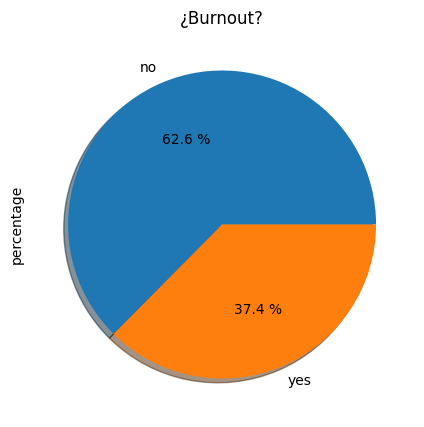

In [110]:
#Gráfico de pastel
filtro11_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("¿Burnout?")

**Hallazgos**
- Podemos ver en la gráfica de pie de esta variable que la mayoría de las PYMEs no se sufren de falta de productos, siendo estas el 62.6% y tan solo el 37.4% de las PYMEs si sufre de esto. Esto puede ser por varios factores, como por ejemplo: alta demanda, mala pronostico de ventas, etc.

##Columna "186_internet_connection"

###Tabla de frequencia

In [111]:
#Tabla de frecuencia

#Analisis de la columna
columna12 = freq_tbl(data2["186_internet_connection"])
columna12

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,114,0.666667,0.666667
1,no,57,0.333333,1.000000


In [112]:
#Ajustamos el índice del data frame con los valores de dicha columna
filtro12_indice = columna12.set_index("186_internet_connection")
filtro12_indice

,frequency,percentage,cumulative_perc
186_internet_connection,,,
yes,114,0.666667,0.666667
no,57,0.333333,1.000000


###Gráfica

Text(0.5, 1.0, '¿Conexión a internet?')

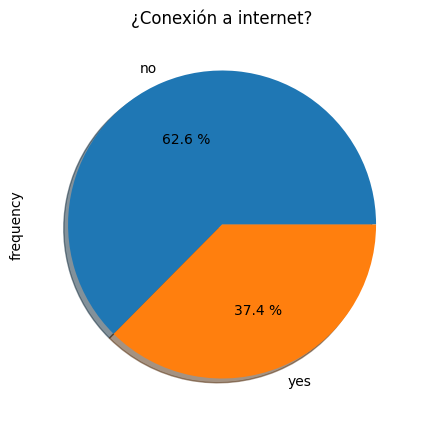

In [113]:
#Gráfico de pastel
filtro11_indice["frequency"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("¿Conexión a internet?")

**Hallazgos**
- Podemos ver en la gráfica de pie de esta variable que la mayoría de PYMEs no cuentan con conexión a internet, siendo estas el 62.6%. Esto no es un buen datos, debido a los beneficios y el impacto que este está teniendo hoy en día. Solo el 37.4% de las PYMEs se están beneficiando de este servicio.

##Columna "189_payment_methods"

###Tabla de frequencia

In [114]:
#Tabla de frecuencia

#Analisis de la columna
columna13 = freq_tbl(data2["189_payment_methods"])
columna13

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,69,0.403509,0.403509
1,"Efectivo,Tarjeta de débito y/o crédito",37,0.216374,0.619883
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",35,0.204678,0.824561
3,"Efectivo,Transferencia interbancaria",26,0.152047,0.976608
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",2,0.011696,0.988304
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [115]:
#Eliminamos aquellos valores cuyas frecuencias sean bajas para un mejor análisis y visualización
filtro13 = columna13[columna13["frequency"]>3]
filtro13

#Ajustamos el índice del data frame con los valores de dicha columna
filtro13_indice = filtro13.set_index("189_payment_methods")
filtro13_indice

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Efectivo,69,0.403509,0.403509
"Efectivo,Tarjeta de débito y/o crédito",37,0.216374,0.619883
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",35,0.204678,0.824561
"Efectivo,Transferencia interbancaria",26,0.152047,0.976608


###Gráfica

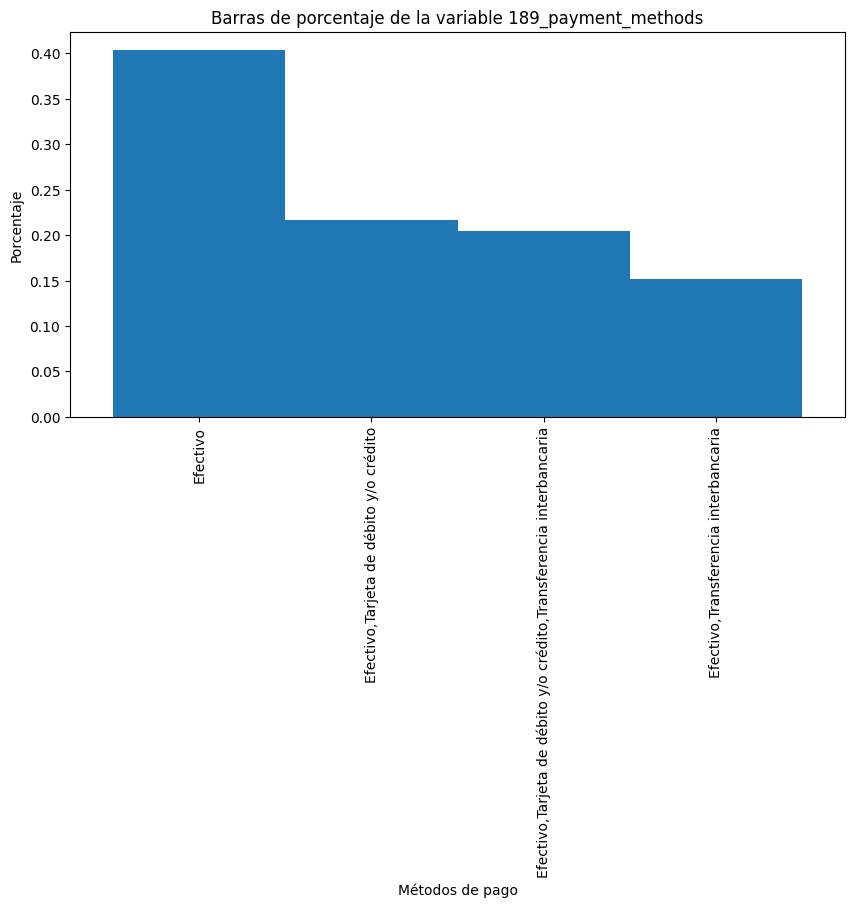

In [117]:
#Histograma (gráfico de barras)
filtro13_indice["percentage"].plot(kind="bar",width=1,figsize=(10,5))
plt.title("Barras de porcentaje de la variable 189_payment_methods")
plt.xlabel("Métodos de pago")
plt.ylabel("Porcentaje")
plt.show()

**Hallazgos**
- Podemos ver en el gráfico de barras de esta variable que el 40% de los clientes pagan con efectivo y que alrededor del 20% paga con efectivo y tarjeta de crédito o débito. Esto son los métodos de pago más comunes, por lo que no es raro que tengo los porcentajes más altos.

##Columna "214_customer_relationship_tools"

###Tabla de frequencia

In [118]:
#Tabla de frecuencia

#Analisis de la columna
columna14 = freq_tbl(data2["214_customer_relationship_tools"])
columna14

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,45,0.263158,0.263158
1,Ninguna,39,0.228070,0.491228
2,Aplicación móvil,36,0.210526,0.701754
3,"Aplicación móvil,Redes sociales",15,0.087719,0.789474
4,Publicidad,14,0.081871,0.871345
5,Cuaderno,13,0.076023,0.947368
6,Teléfono,2,0.011696,0.959064
7,Físico,2,0.011696,0.970760
8,"Cuaderno,Redes sociales",1,0.005848,0.976608
9,"Aplicación móvil,De frente",1,0.005848,0.982456


In [119]:
#Eliminamos aquellos valores cuyas frecuencias sean bajas para un mejor análisis y visualización
filtro14 = columna14[columna14["frequency"]>3]
filtro14

#Ajustamos el índice del data frame con los valores de dicha columna
filtro14_indice = filtro14.set_index("214_customer_relationship_tools")
filtro14_indice

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Redes sociales,45,0.263158,0.263158
Ninguna,39,0.228070,0.491228
Aplicación móvil,36,0.210526,0.701754
"Aplicación móvil,Redes sociales",15,0.087719,0.789474
Publicidad,14,0.081871,0.871345
Cuaderno,13,0.076023,0.947368


###Gráfica

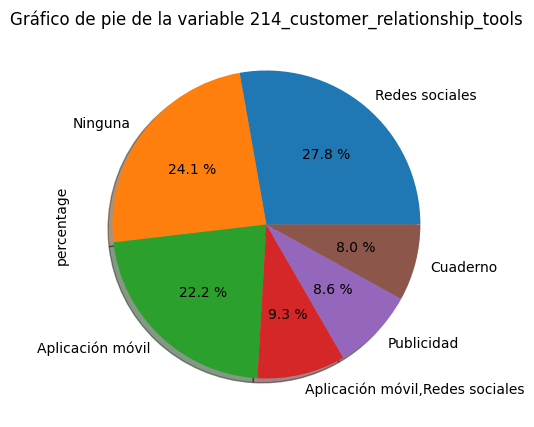

In [120]:
#Gráfico de área
filtro14_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("Gráfico de pie de la variable 214_customer_relationship_tools")
plt.show()


**Hallazgos**
- Podemos ver en el gráfico de pie que las herramientas de las PYMEs para relacionarse con los clientes más frecuentes son: Redes sociales y una aplicación movil. Esto hace sentido, ya que el internet es una gran herramienta para expandir tu mercado y hacerte conocer. Las menos comunes son publicidad y en cuadernos.

##Columna "33_credit_to_customers"

###Tabla de frequencia

In [121]:
#Tabla de frecuencia

#Analisis de la columna
columna15 = freq_tbl(data2["33_credit_to_customers"])
columna15

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,117,0.684211,0.684211
1,yes,54,0.315789,1.000000


In [122]:
#Ajustamos el índice del data frame con los valores de dicha columna
filtro15_indice = columna15.set_index("33_credit_to_customers")
filtro15_indice

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,117,0.684211,0.684211
yes,54,0.315789,1.000000


###Gráfica

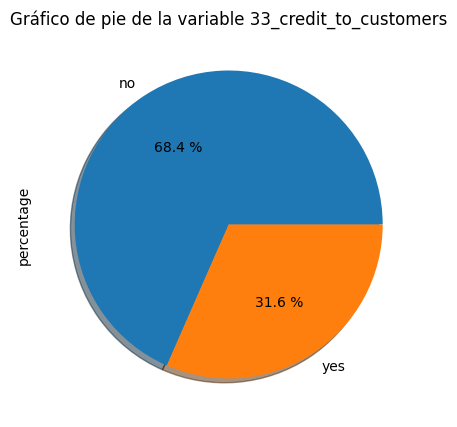

In [123]:
#Gráfico de área
filtro15_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("Gráfico de pie de la variable 33_credit_to_customers")
plt.show()


**Hallazgos**
- Podemos ver en el gráfico de pie que el 68.4% de las PYMEs no otorgan crédito a sus clientes y solo el 31.6% si lo hacen.

##Columna "227_agreement_ecommerce_platforms"

###Tabla de frequencia

In [124]:
#Tabla de frecuencia

#Analisis de la columna
columna16 = freq_tbl(data2["227_agreement_ecommerce_platforms"])
columna16

,227_agreement_ecommerce_platforms,frequency,percentage,cumulative_perc
0,no,155,0.906433,0.906433
1,yes,16,0.093567,1.000000


In [125]:
#Ajustamos el índice del data frame con los valores de dicha columna
filtro16_indice = columna16.set_index("227_agreement_ecommerce_platforms")
filtro16_indice

,frequency,percentage,cumulative_perc
227_agreement_ecommerce_platforms,,,
no,155,0.906433,0.906433
yes,16,0.093567,1.000000


###Gráfica

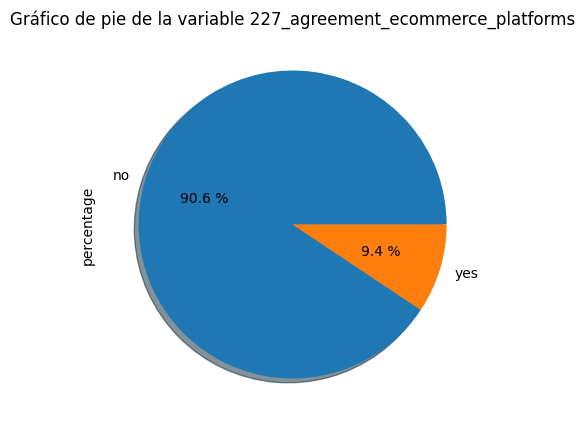

In [126]:
#Gráfico de área
filtro16_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("Gráfico de pie de la variable 227_agreement_ecommerce_platforms")
plt.show()


**Hallazgos**
- Podemos ver en la gráfica de pie de esta variable que el 90.6% de las PYMEs no tiene algún acuerdo con una plataforma en línea. Esto es un valor significativamente alto, ya que las ventas de PYMEs se podrían ver impactadas positivamente si se apoyaran de plataformas online, ya que más personas tendrían acceso a sus productos y/o servicios.

##Columna "157_frequency_organize_shelves "

###Tabla de frequencia

In [127]:
#Tabla de frecuencia

#Analisis de la columna
columna17 = freq_tbl(data2["157_frequency_organize_shelves"])
columna17

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Diariamente,67,0.391813,0.391813
1,Semanalmente,66,0.385965,0.777778
2,Nunca,16,0.093567,0.871345
3,Mensualmente,12,0.070175,0.941520
4,Quincenalmente,5,0.029240,0.970760
5,Semestralmente,2,0.011696,0.982456
6,Anualmente,2,0.011696,0.994152
7,No se tiene,1,0.005848,1.000000


In [128]:
#Eliminamos aqueloss valores cuyas frecuencias sean bajas para un mejor análisis
filtro17 = columna17[columna17["frequency"]>4]

#Ajustamos el índice del data frame con los valores de dicha columna
filtro17_indice = filtro17.set_index("157_frequency_organize_shelves")
filtro17_indice

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Diariamente,67,0.391813,0.391813
Semanalmente,66,0.385965,0.777778
Nunca,16,0.093567,0.871345
Mensualmente,12,0.070175,0.941520
Quincenalmente,5,0.029240,0.970760


###Gráfica

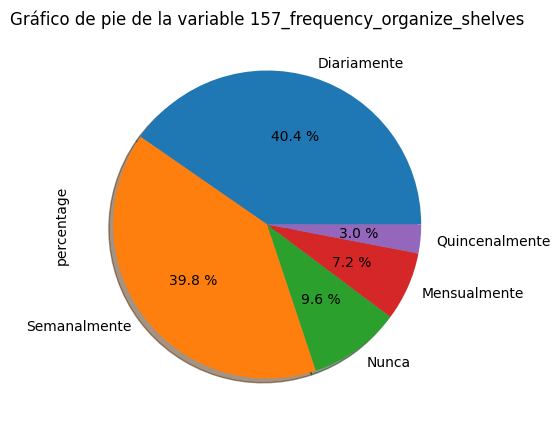

In [129]:
#Gráfico de área
filtro17_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("Gráfico de pie de la variable 157_frequency_organize_shelves")
plt.show()


**Hallazgos**
- Podemos ver en el gráfico de pie de esta variable que frecuencia más común de organizar las estanterías es diariamente y semanalmente. Tambien podemos ver que solo el 10% de las PYMEs no lo hacen nunca.

##Columna "158_charact_organize_products_on_shelves"

###Tabla de frequencia

In [130]:
#Tabla de frecuencia

#Analisis de la columna
columna18 = freq_tbl(data2["158_charact_organize_products_on_shelves"])
columna18

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,"Categoría (e.g. limpieza, aseo personal, comes...",45,0.263158,0.263158
1,Frecuencia de venta,32,0.187135,0.450292
2,Tamaño,24,0.140351,0.590643
3,Margen de utilidad,14,0.081871,0.672515
4,"Refrigeración,Tamaño",10,0.058480,0.730994
5,"Categoría (e.g. limpieza, aseo personal, comes...",6,0.035088,0.766082
6,Precio,6,0.035088,0.801170
7,"Categoría (e.g. limpieza, aseo personal, comes...",5,0.029240,0.830409
8,Ninguna,5,0.029240,0.859649
9,Refrigeración,4,0.023392,0.883041


In [131]:
#Eliminamos aqueloss valores cuyas frecuencias sean bajas para un mejor análisis
filtro18 = columna18[columna18["frequency"]>6]

#Ajustamos el índice del data frame con los valores de dicha columna
filtro18_indice = filtro18.set_index("158_charact_organize_products_on_shelves")
filtro18_indice

,frequency,percentage,cumulative_perc
158_charact_organize_products_on_shelves,,,
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",45,0.263158,0.263158
Frecuencia de venta,32,0.187135,0.450292
Tamaño,24,0.140351,0.590643
Margen de utilidad,14,0.081871,0.672515
"Refrigeración,Tamaño",10,0.058480,0.730994


###Gráfica

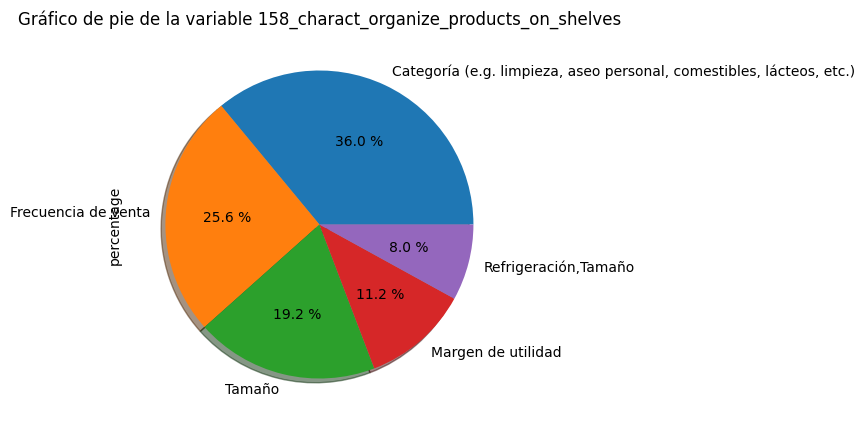

In [132]:
#Gráfico de área
filtro18_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("Gráfico de pie de la variable 158_charact_organize_products_on_shelves")
plt.show()


**Hallazgo**
- Podemos ver en el gráfico de pie que la forma más común de organizar sus productos en las PYMEs es por categoría, el 36% lo hace asi, seguido de frecuencia de venta y tamaño del producto. Estos 3 son los tipos de organización más comunes, pero tambien existen otros como por margen de utilidad y refrigeración.

##Columna "161_actions_stockouts"

###Tabla de frequencia

In [133]:
#Tabla de frecuencia

#Analisis de la columna
columna19 = freq_tbl(data2["161_actions_stockouts"])
columna19

,161_actions_stockouts,frequency,percentage,cumulative_perc
0,Solicitar tiempo al cliente para conseguir el ...,61,0.356725,0.356725
1,Ofrecer un producto sustituto,32,0.187135,0.543860
2,"Ofrecer un producto sustituto,Solicitar tiempo...",24,0.140351,0.684211
3,Informar al proveedor,18,0.105263,0.789474
4,Perder la venta,14,0.081871,0.871345
5,"Informar al proveedor,Ofrecer un producto sust...",8,0.046784,0.918129
6,"Informar al proveedor,Solicitar tiempo al clie...",5,0.029240,0.947368
7,"Informar al proveedor,Ofrecer un producto sust...",2,0.011696,0.959064
8,"Informar al proveedor,Perder la venta",2,0.011696,0.970760
9,"Ofrecer un producto sustituto,Perder la venta",2,0.011696,0.982456


In [134]:
#Eliminamos aqueloss valores cuyas frecuencias sean bajas para un mejor análisis
filtro19 = columna19[columna19["frequency"]>5]

#Ajustamos el índice del data frame con los valores de dicha columna
filtro19_indice = filtro19.set_index("161_actions_stockouts")
filtro19_indice

,frequency,percentage,cumulative_perc
161_actions_stockouts,,,
Solicitar tiempo al cliente para conseguir el producto,61,0.356725,0.356725
Ofrecer un producto sustituto,32,0.187135,0.543860
"Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto",24,0.140351,0.684211
Informar al proveedor,18,0.105263,0.789474
Perder la venta,14,0.081871,0.871345
"Informar al proveedor,Ofrecer un producto sustituto",8,0.046784,0.918129


###Gráfica

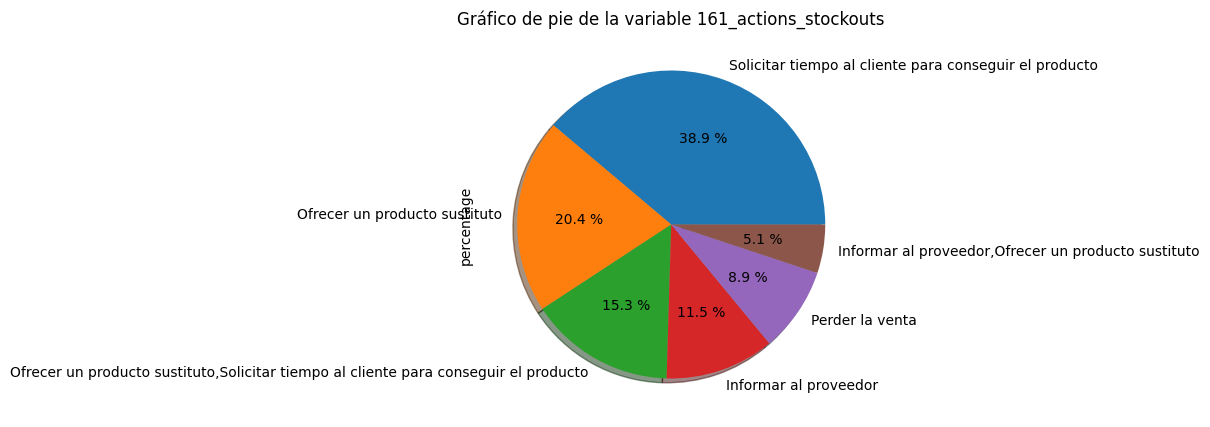

In [135]:
#Gráfico de área
filtro19_indice["percentage"].plot(kind="pie",figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title("Gráfico de pie de la variable 161_actions_stockouts")
plt.show()


**Hallazgo**
- En la gráfica de pie de esta varible podemos ver que la acción más frecuentes de las PYMEs cuando se les agota un producto es: Solicitar tiempo al cliente para conseguir el producto, seguido de ofrecer un producto sustituto y informar a proveedor.

##Columna "162_inventory_extra_space  "

###Tabla de frequencia

In [136]:
#Tabla de frecuencia

#Analisis de la columna
columna20 = freq_tbl(data2["162_inventory_extra_space"])
columna20

,162_inventory_extra_space,frequency,percentage,cumulative_perc
0,0,59,0.345029,0.345029
1,20%,36,0.210526,0.555556
2,10%,29,0.169591,0.725146
3,50% +,21,0.122807,0.847953
4,30%,13,0.076023,0.923977
5,2%,8,0.046784,0.970760
6,40%,5,0.029240,1.000000


In [137]:
#Eliminamos aqueloss valores cuyas frecuencias sean bajas para un mejor análisis
filtro20 = columna20[columna20["frequency"]>8]

#Ajustamos el índice del data frame con los valores de dicha columna
filtro20_indice = filtro20.set_index("162_inventory_extra_space")
filtro20_indice

,frequency,percentage,cumulative_perc
162_inventory_extra_space,,,
0,59,0.345029,0.345029
20%,36,0.210526,0.555556
10%,29,0.169591,0.725146
50% +,21,0.122807,0.847953
30%,13,0.076023,0.923977


###Gráfica

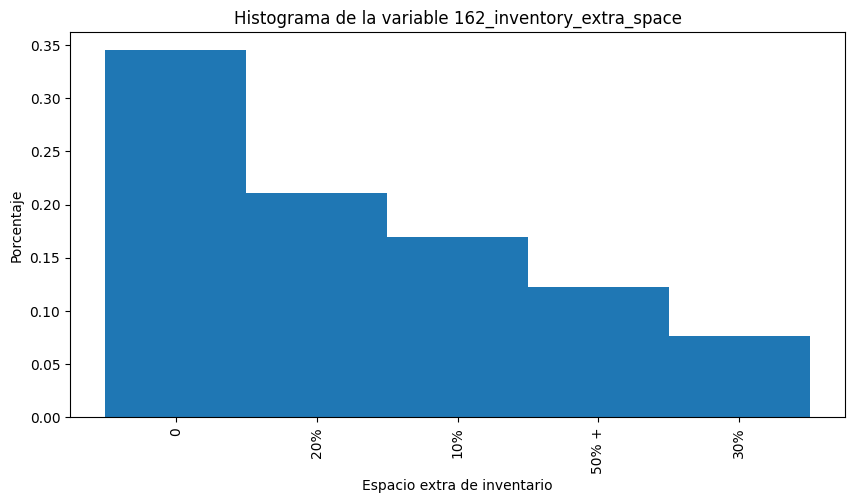

In [139]:
#Histograma (gráfico de barras)
filtro20_indice["percentage"].plot(kind="bar",width=1,figsize=(10,5))
plt.title("Histograma de la variable 162_inventory_extra_space")
plt.xlabel("Espacio extra de inventario")
plt.ylabel("Porcentaje")
plt.show()

**Hallazgo**
- En el gráfico de barras de esta variable podemos ver que el 35% de las PYMEs no necesitan espacio extra para su inventario, les es sufuciente con el que tienen. El procentaje restante, que es 65%, es de PYMEs que necesitan de 10% hasta más de 50% más de espacio para su inventario. Por lo que podemos concluir que la mayoría de la PYMEs no les es suficiente su espacio para su inventario.